# Online Course Prediction Using Linear Regression 

### 1. References

- https://machinelearningmastery.com/data-preparation-without-data-leakage/

- https://medium.com/analytics-vidhya/mae-mse-rmse-coefficient-of-determination-adjusted-r-squared-which-metric-is-better-cd0326a5697e


### 2. Library import and data preparation

In [78]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import Lasso

# Reading the dataset prepared from Lab1 
df = pd.read_csv("dataset/Lab02_prepared.csv",index_col=None)

# Displaying the first 5 rows of the data
print(df.head(),"\n")

# Displaying the column information
print(df.info(),"\n")

# Displaying the shape od dataset
print("Shape of Dataframe is:", df.shape,"\n")

         CourseCategory  InstRating  Lectures  Duration  AvgRating  \
0              business         4.5     286.0      9.80        4.6   
1           programming         4.2      66.0      4.97        4.2   
2           it_software         4.5     251.0     93.15        4.4   
3           it_software         4.7      26.0      2.05        4.7   
4  personal_development         4.4      82.0     11.07        4.4   

   LastUpdated    Fee  Discount  cbrt_NumberRatings  cbrt_Enrollment  \
0          3.0  19.99      88.0           27.951020        48.974581   
1          3.0  16.99      88.0           11.416535        20.853094   
2          5.0  17.99      89.0           19.004616        31.409753   
3          3.0  16.99      80.0           16.913051        25.146869   
4          6.0  16.99      83.0            8.946181        17.940130   

   cbrt_Student  cbrt_Review  category_design  category_it_software  \
0     74.041978    44.791629                0                     0   
1   

In [79]:
# Dropping 'CourseCategory' since I didn't drop in Lab-2
df = df.drop('CourseCategory', axis=1)

### 3. Exploratory Data Analysis

        InstRating     Lectures     Duration    AvgRating  LastUpdated  \
count  1883.000000  1883.000000  1883.000000  1883.000000  1883.000000   
mean      4.430589   105.238449    11.792209     4.423686     3.757302   
std       0.187973    99.708331    13.094063     0.235237     1.292932   
min       3.800000     5.000000     0.500000     2.700000     3.000000   
25%       4.300000    44.000000     4.330000     4.300000     3.000000   
50%       4.500000    74.000000     7.780000     4.500000     3.000000   
75%       4.600000   125.000000    14.175000     4.600000     4.000000   
max       4.800000   699.000000   164.000000     4.900000    12.000000   

               Fee     Discount  cbrt_NumberRatings  cbrt_Enrollment  \
count  1883.000000  1883.000000         1883.000000      1883.000000   
mean     23.476989    78.566649           12.610265        22.852516   
std      20.332079    16.455207            5.883152        10.069789   
min      16.990000    30.000000            2.

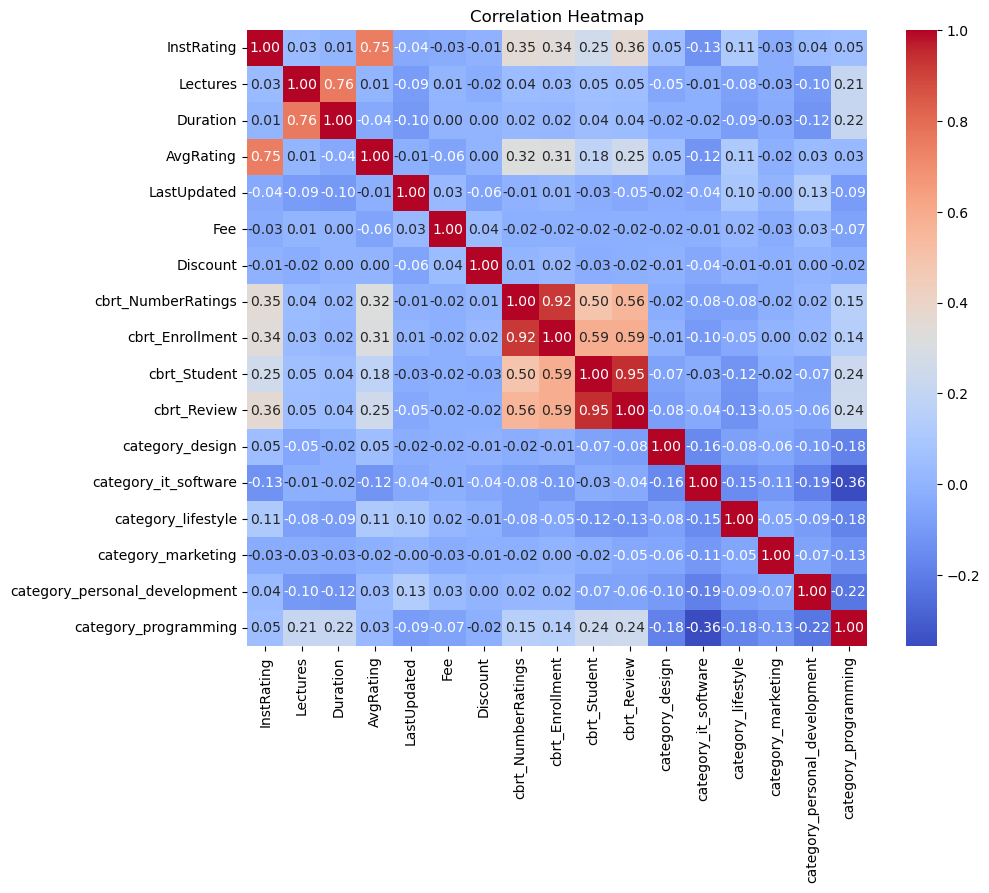

In [80]:
# Summary statistics of the dataset
print(df.describe())

# Correlation matrix of the dataset
correlation = df.corr()

# Plotting heatmap of correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

#### 3.c. Univariate Analysis

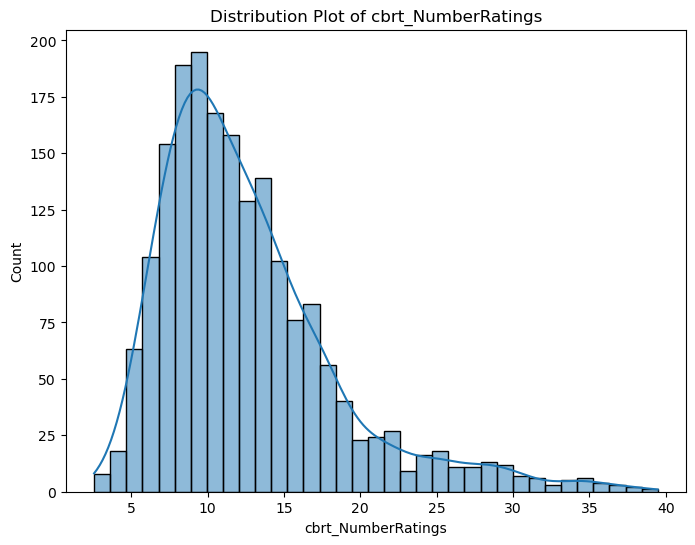

In [81]:
# Plotting teh distribution plot
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='cbrt_NumberRatings', kde=True)
plt.title('Distribution Plot of cbrt_NumberRatings')
plt.xlabel('cbrt_NumberRatings')
plt.ylabel('Count')
plt.show()


#### Observation for Distribution Plot:

The distribution of the `cbrt_NumberRatings` column has a single peak without significant outliers. But still dropping records where `cbrt_NumberRatings` is higher than 30 will make the distribution look more close to normal distribution. 

- There are outliers at the right side of the graph after 30
- We can observe that the `cbrt_NumberRatings` values are distributed between 1 and 40.
- In order to create a more useful model we need to make the distribution look more close to normal distribution by getting rid of oiutliers



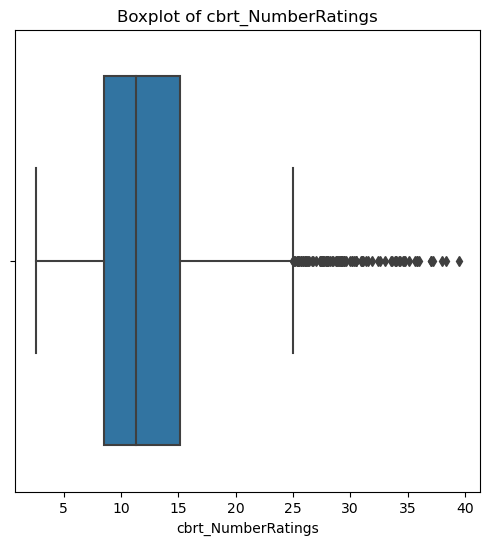

In [82]:
# Plotting the boxplot
plt.figure(figsize=(6, 6))
sns.boxplot(data=df, x='cbrt_NumberRatings')
plt.title('Boxplot of cbrt_NumberRatings')
plt.xlabel('cbrt_NumberRatings')
plt.show()

#### Observation for Box Plot:

- Like in the distribution plot,  `cbrt_NumberRatings` values are distributed between 1 and 40.
- Boxplot depicts positive skewed characteristic.
- In the box plot the outlier are more obvious. We can clearly see the outliers after 30 should be dropped
- The vertical line in the box is showing that median value is around 12

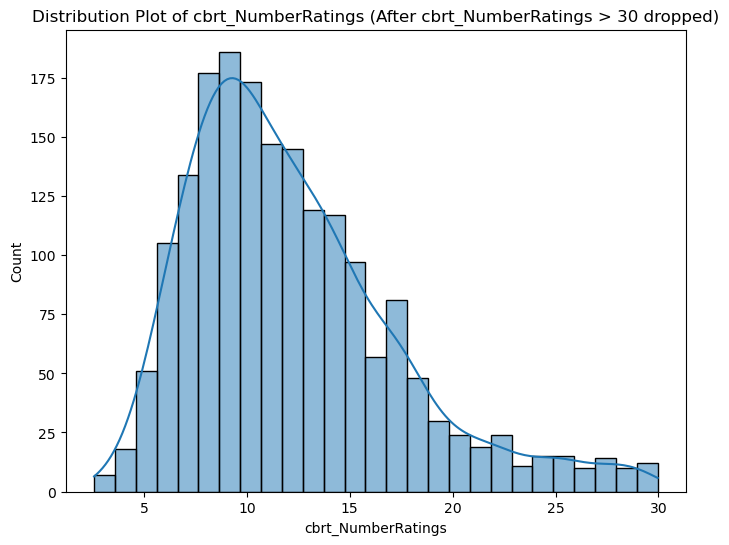

In [83]:
# Finding the index of records where cbrt_NumberRatings > 30
indexes_higher_than_30 = df[df['cbrt_NumberRatings'] > 30].index

# Dropping the records
df.drop(indexes_higher_than_30, inplace=True)

# Plotting distribution plot after dropping records
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='cbrt_NumberRatings', kde=True)
plt.title('Distribution Plot of cbrt_NumberRatings (After cbrt_NumberRatings > 30 dropped)')
plt.xlabel('cbrt_NumberRatings')
plt.ylabel('Count')
plt.show()


#### 3.d. Multivariate Analysis

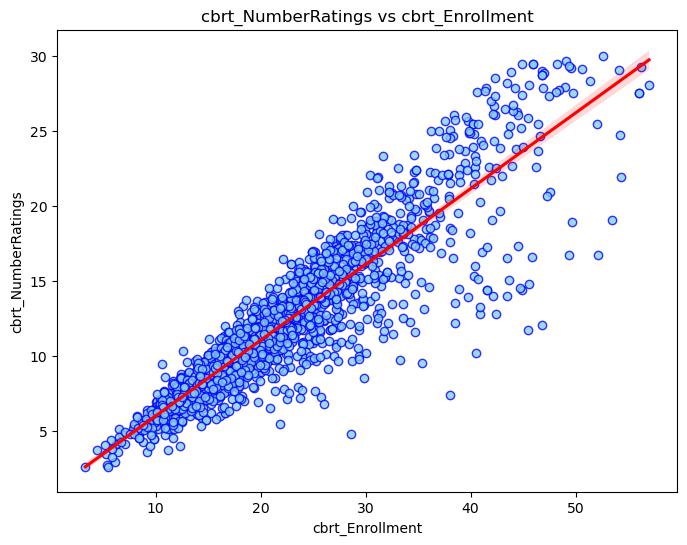

In [84]:
# Displaying a multivariate analysis plot for cbrt_NumberRatings against cbrt_Enrollment
plt.figure(figsize=(8, 6))
sns.regplot(data=df, x='cbrt_Enrollment', y='cbrt_NumberRatings', 
            scatter_kws={'facecolors': 'skyblue', 'edgecolors': 'b'}, line_kws={'color': 'red'})
plt.title('cbrt_NumberRatings vs cbrt_Enrollment')
plt.xlabel('cbrt_Enrollment')
plt.ylabel('cbrt_NumberRatings')
plt.show()

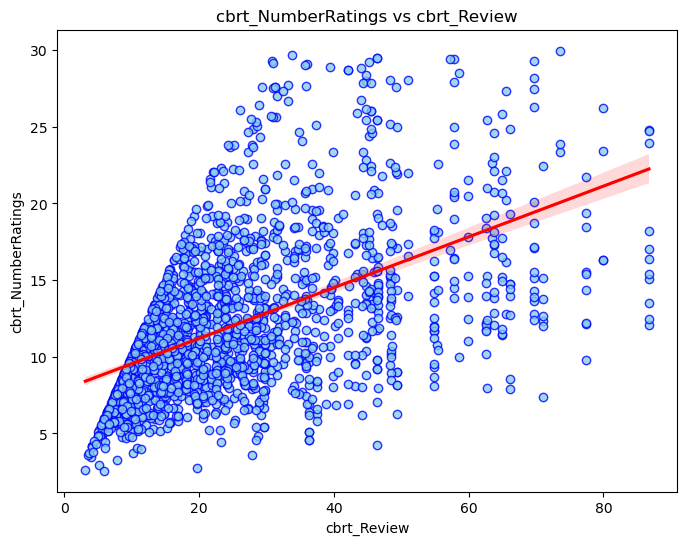

In [85]:
# Displaying a multivariate analysis plot for cbrt_NumberRatings against cbrt_Review
plt.figure(figsize=(8, 6))
sns.regplot(data=df, x='cbrt_Review', y='cbrt_NumberRatings', 
            scatter_kws={'facecolors': 'skyblue', 'edgecolors': 'b'}, line_kws={'color': 'red'})
plt.title('cbrt_NumberRatings vs cbrt_Review')
plt.xlabel('cbrt_Review')
plt.ylabel('cbrt_NumberRatings')
plt.show()

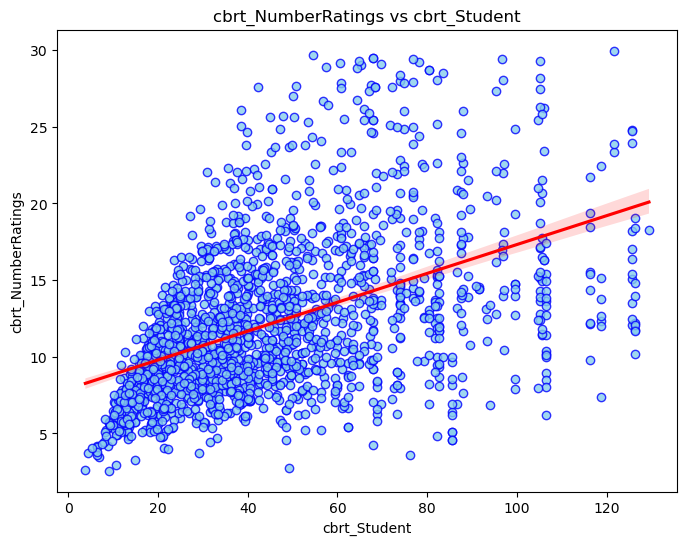

In [86]:
# Displaying a multivariate analysis plot for cbrt_NumberRatings against cbrt_Student
plt.figure(figsize=(8, 6))
sns.regplot(data=df, x='cbrt_Student', y='cbrt_NumberRatings', 
            scatter_kws={'facecolors': 'skyblue', 'edgecolors': 'b'}, line_kws={'color': 'red'})
plt.title('cbrt_NumberRatings vs cbrt_Student')
plt.xlabel('cbrt_Student')
plt.ylabel('cbrt_NumberRatings')
plt.show()

#### 3.e. Feature Observation and Hypothesis

In [87]:
# Listing all the features' correlations against the 
    #cbrt_NumberRatings in order to gather information for observation and hypothesis 
corr_matrix_list = df.corrwith(df['cbrt_NumberRatings']).sort_values(ascending=False)
corr_matrix_list = corr_matrix_list.reset_index()
corr_matrix_list.columns = ['Features', 'Correlation']
print(corr_matrix_list)

                         Features  Correlation
0              cbrt_NumberRatings     1.000000
1                 cbrt_Enrollment     0.907349
2                     cbrt_Review     0.530124
3                    cbrt_Student     0.479917
4                      InstRating     0.340117
5                       AvgRating     0.303100
6            category_programming     0.119557
7                        Lectures     0.036535
8   category_personal_development     0.025452
9                        Duration     0.023707
10                       Discount     0.003023
11                    LastUpdated    -0.007120
12             category_marketing    -0.017000
13                category_design    -0.017157
14                            Fee    -0.031098
15             category_lifestyle    -0.065969
16           category_it_software    -0.067810


#### Step A- 3.e. Feature Observation and Hypothesis

###### Feature Observations:

- `cbrt_Enrollment`: This feature represents the highest correlation between `cbrt_NumberRatings` with  0.907349
- `cbrt_Review`: This feature represents second highest correlation between `cbrt_NumberRatings` with 0.530124
- `cbrt_Student`: This feature represents third highest correlation between `cbrt_NumberRatings` with 0.479917

###### My Hypothesis:

- **Hypothesis 1:** `cbrt_Enrollment` is positively correlated with a `cbrt_NumberRatings`. It is expected that courses with more enrollments attract more students who are likely to rate the course.
- **Hypothesis 2:** `cbrt_Review` is positively correlated with `cbrt_NumberRatings`. Positive reviews may motivate other students to rate the course.
- **Hypothesis 3:** `cbrt_Student` is positively correlated with `cbrt_NumberRatings`. Courses with more students have a higher probability of receiving ratings.

### 4. Feature Selection

#### 4.a. Creating a copy of the original dataframe

In [88]:
# Creating a copy of the original dataframe
df_copy = df.copy()

# Assigning 'cbrt_NumberRatings' column to the 'target' variable
target = df_copy['cbrt_NumberRatings']

#### 4.b. Correlation Based Selection (manual or threshold)

In [89]:
# Calculate the correlation between features
corr_matrix_list = df.corrwith(df['cbrt_NumberRatings']).sort_values(ascending=False)
corr_matrix_list = corr_matrix_list.reset_index()
corr_matrix_list.columns = ['Features', 'Correlation']
print(corr_matrix_list)

                         Features  Correlation
0              cbrt_NumberRatings     1.000000
1                 cbrt_Enrollment     0.907349
2                     cbrt_Review     0.530124
3                    cbrt_Student     0.479917
4                      InstRating     0.340117
5                       AvgRating     0.303100
6            category_programming     0.119557
7                        Lectures     0.036535
8   category_personal_development     0.025452
9                        Duration     0.023707
10                       Discount     0.003023
11                    LastUpdated    -0.007120
12             category_marketing    -0.017000
13                category_design    -0.017157
14                            Fee    -0.031098
15             category_lifestyle    -0.065969
16           category_it_software    -0.067810


In [90]:
# I created the Functions folder
# Within the function jupyter notebook file I created four functions; 
# 1- select_correlation(data), 2- select_variance(data, threshold) , 3- select_kbest(data, num), 4-make_log(data)
%run Functions/Functions_FDu52424.ipynb

In [91]:
# Create a new dataframe with selected features using the select_correlation function
# select_correlation function defined in functions folder and it returns features where correlation is ghigher than  0.1
df_corr = select_correlation(df_copy)

# Display the new dataframe
print(df_corr.head())


   cbrt_Enrollment  cbrt_Review  cbrt_Student  InstRating  AvgRating  \
0        48.974581    44.791629     74.041978         4.5        4.6   
1        20.853094    17.819177     31.853168         4.2        4.2   
2        31.409753    36.717597     72.232850         4.5        4.4   
3        25.146869    24.546490     35.740678         4.7        4.7   
4        17.940130    25.027703     41.425278         4.4        4.4   

   category_programming  
0                     0  
1                     1  
2                     0  
3                     0  
4                     0  


#### 4.c. Variance Threshold Selection

In [92]:
# Calling the select_variance function to perform Variance Threshold feature selection with threshold 3 
# select_variance function defined in functions folder
df_vt = select_variance(df_copy, 3)
df_vt.head()

,Lectures,Duration,Fee,Discount,cbrt_Enrollment,cbrt_Student,cbrt_Review
0,286.0,9.80,19.99,88.0,48.974581,74.041978,44.791629
1,66.0,4.97,16.99,88.0,20.853094,31.853168,17.819177
2,251.0,93.15,17.99,89.0,31.409753,72.232850,36.717597
3,26.0,2.05,16.99,80.0,25.146869,35.740678,24.546490
4,82.0,11.07,16.99,83.0,17.940130,41.425278,25.027703


#### 4.d. Select K-Best method

In [93]:
# Calling the select_kbest function to perform Select K-Best feature selection
# select_kbest function defined in functions folder
k = 6
df_selectKBest = select_kbest(df_copy, k)
df_selectKBest.head()

,InstRating,AvgRating,cbrt_Enrollment,cbrt_Student,cbrt_Review,category_programming
0,4.5,4.6,48.974581,74.041978,44.791629,0
1,4.2,4.2,20.853094,31.853168,17.819177,1
2,4.5,4.4,31.409753,72.232850,36.717597,0
3,4.7,4.7,25.146869,35.740678,24.546490,0
4,4.4,4.4,17.940130,41.425278,25.027703,0


### 5. Linear Regression Models with Feature Selection, Feature transformation and Scaling

I have already target variable which I defined above and I will use `df_corr` as features
- Correlation based selected features
    - Robust scaler
    - log1p transform
- Variance Threshold Selection features
    - Robust scaler
    - log1p transform
- SelectKBest Selection features
    - Robust scaler
    - log1p transform

### 5 Linear Regression model with the Correlation based selected features

In [94]:
# Placeholder lists to store the experiment results
fselection_list = []
ftransform_list = []
r2_list = []
rmse_list = []

#### 5.a. Linear Regression model with the Correlation based selected features

In [95]:
# Splitting the data into train and test sets using 75:25 training and testing and random_state=42
X_train, X_test, y_train, y_test = train_test_split(df_corr, target, test_size=0.25, random_state=42)

# Applying RobustScaler transformation
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Creating and fitting the linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Predicting on the test set
y_pred = lr_model.predict(X_test_scaled)

# Calculating RMSE and R2 scores
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Appending the information to the respective lists
fselection_list.append("Correlation")
ftransform_list.append("None")
r2_list.append(r2)
rmse_list.append(rmse)

#### 5.b. Linear Regression model with Correlation based selected features and Log1p transformation

In [96]:
# Linear Regression model with Correlation based selected features and Log1p transformation
from sklearn.preprocessing import RobustScaler

# Applying Log1p transformation using the make_log() function
X_train_log1p = make_log(X_train)
X_test_log1p = make_log(X_test)

# Applying RobustScaler transformation
scaler = RobustScaler()
X_train_scaled_log1p = scaler.fit_transform(X_train_log1p)
X_test_scaled_log1p = scaler.transform(X_test_log1p)

# Creating and fitting the linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled_log1p, y_train)

# Predicting on the test set
y_pred_log1p = lr_model.predict(X_test_scaled_log1p)

# Calculating RMSE and R2 scores
rmse_log1p = np.sqrt(mean_squared_error(y_test, y_pred_log1p))
r2_log1p = r2_score(y_test, y_pred_log1p)

# Appending the information to the respective lists
fselection_list.append("Correlation")
ftransform_list.append("Log1p")
r2_list.append(r2_log1p)
rmse_list.append(rmse_log1p)


#### 5.c. Linear Regression model with Variance Threshold Selection

In [97]:
# Selecting the features from df_vt
X_vt = df_vt.copy()

# Splitting the data into train and test sets
X_train_vt, X_test_vt, y_train, y_test = train_test_split(X_vt, target, test_size=0.25, random_state=42)

# Applying RobustScaler transformation
scaler = RobustScaler()
X_train_scaled_vt = scaler.fit_transform(X_train_vt)
X_test_scaled_vt = scaler.transform(X_test_vt)

# Creating and fitting the linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled_vt, y_train)

# Predicting on the test set
y_pred_vt = lr_model.predict(X_test_scaled_vt)

# Calculating RMSE and R2 scores
rmse_vt = np.sqrt(mean_squared_error(y_test, y_pred_vt))
r2_vt = r2_score(y_test, y_pred_vt)

# Appending the information to the respective lists
fselection_list.append("Variance")
ftransform_list.append("None")
r2_list.append(r2_vt)
rmse_list.append(rmse_vt)

#### 5.c. Linear Regression model with Variance Threshold Selection and Log1p transformation

In [98]:
# Selecting the features from df_vt
X_vt = df_vt.copy()

# Applying Log1p transformation
X_vt_log1p = make_log(X_vt)

# Splitting the data into train and test sets
X_train_vt_log1p, X_test_vt_log1p, y_train, y_test = train_test_split(X_vt_log1p, target, test_size=0.25, random_state=42)

# Applying RobustScaler transformation
scaler = RobustScaler()
X_train_scaled_vt_log1p = scaler.fit_transform(X_train_vt_log1p)
X_test_scaled_vt_log1p = scaler.transform(X_test_vt_log1p)

# Creating and fitting the linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled_vt_log1p, y_train)

# Predicting on the test set
y_pred_vt_log1p = lr_model.predict(X_test_scaled_vt_log1p)

# Calculating RMSE and R2 scores
rmse_vt_log1p = np.sqrt(mean_squared_error(y_test, y_pred_vt_log1p))
r2_vt_log1p = r2_score(y_test, y_pred_vt_log1p)

# Appending the information to the respective lists
fselection_list.append("Variance")
ftransform_list.append("Log1p")
r2_list.append(r2_vt_log1p)
rmse_list.append(rmse_vt_log1p)


#### 5.d. Linear Regression model with SelectKBest Selection

In [99]:
# Selecting the features from df_selectKBest
X_selectKBest = df_selectKBest.copy()

# Splitting the data into train and test sets
X_train_selectKBest, X_test_selectKBest, y_train, y_test = train_test_split(X_selectKBest, target, test_size=0.25, random_state=42)

# Applying RobustScaler transformation
scaler = RobustScaler()
X_train_scaled_selectKBest = scaler.fit_transform(X_train_selectKBest)
X_test_scaled_selectKBest = scaler.transform(X_test_selectKBest)

# Applying SelectKBest feature selection
selector = SelectKBest(f_regression, k=6)  
X_train_selected = selector.fit_transform(X_train_scaled_selectKBest, y_train)
X_test_selected = selector.transform(X_test_scaled_selectKBest)

# Creating and fitting the linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train_selected, y_train)

# Predicting on the test set
y_pred_selectKBest = lr_model.predict(X_test_selected)

# Calculating RMSE and R2 scores
rmse_selectKBest = np.sqrt(mean_squared_error(y_test, y_pred_selectKBest))
r2_selectKBest = r2_score(y_test, y_pred_selectKBest)

# Appending the information to the respective lists
fselection_list.append("SelectKBest")
ftransform_list.append("None")
r2_list.append(r2_selectKBest)
rmse_list.append(rmse_selectKBest)


#### 5.d. Linear Regression model with SelectKBest Selection and Log1p transformation

In [100]:
# Selecting the features from df_selectKBest
X_selectKBest = df_selectKBest.copy()

# Applying log1p transformation to the features
X_selectKBest_transformed = make_log(X_selectKBest)

# Splitting the data into train and test sets
X_train_selectKBest, X_test_selectKBest, y_train, y_test = train_test_split(X_selectKBest_transformed, target, test_size=0.25, random_state=42)

# Applying RobustScaler transformation
scaler = RobustScaler()
X_train_scaled_selectKBest = scaler.fit_transform(X_train_selectKBest)
X_test_scaled_selectKBest = scaler.transform(X_test_selectKBest)

# Applying SelectKBest feature selection
selector = SelectKBest(f_regression, k=6)  
X_train_selected = selector.fit_transform(X_train_scaled_selectKBest, y_train)
X_test_selected = selector.transform(X_test_scaled_selectKBest)

# Creating and fitting the linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train_selected, y_train)

# Predicting on the test set
y_pred_selectKBest = lr_model.predict(X_test_selected)

# Calculating RMSE and R2 scores
rmse_selectKBest = np.sqrt(mean_squared_error(y_test, y_pred_selectKBest))
r2_selectKBest = r2_score(y_test, y_pred_selectKBest)

# Appending the information to the respective lists
fselection_list.append("SelectKBest")
ftransform_list.append("Log1p")
r2_list.append(r2_selectKBest)
rmse_list.append(rmse_selectKBest)


### 6. Linear Regression Model with Lasso

In [105]:
# Selecting all features for Lasso regression apart from target variable
lasso_features = df_copy.drop(['cbrt_NumberRatings'], axis=1)

# Assigning features and target variables
features = lasso_features

# Setting alpha values for Lasso
alphas = [0.001, 0.01, 0.1, 1.0, 10.0]

# Creating empty lists to store RMSE, R2, and Lasso models for each alpha value
lasso_rmse_list = []
lasso_r2_list = []
lasso_model_list = []

# Splitting the data into training and test sets using the same random state
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=42)

# Calculating Lasso scores, R^2, and RMSE for each alpha
for alpha in alphas:
    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(X_train, y_train)
    y_pred = lasso_model.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    lasso_rmse_list.append(rmse)
    lasso_r2_list.append(r2)
    lasso_model_list.append(lasso_model)


# Selecting the index of the best alpha value (0.001) where R2 is max and RMSE is min
best_alpha_index = alphas.index(0.001)

# Appending the information to the lists
fselection_list.append("Lasso Alpha = " + str(alphas[best_alpha_index]))
ftransform_list.append("None")
r2_list.append(lasso_r2_list[best_alpha_index])
rmse_list.append(lasso_rmse_list[best_alpha_index])

# Creating a DataFrame to store the results
lasso_df = pd.DataFrame(zip(alphas, lasso_r2_list, lasso_rmse_list), columns=['Alpha', 'R2', 'RMSE'])
print(lasso_df)


    Alpha        R2      RMSE
0   0.001  0.900722  1.754775
1   0.010  0.900135  1.759953
2   0.100  0.898750  1.772120
3   1.000  0.890812  1.840269
4  10.000  0.781751  2.601781


### 7. Plot and summary analysis

In [102]:
# Combine the information into a DataFrame
summary_df = pd.DataFrame(list(zip(fselection_list, ftransform_list, r2_list, rmse_list)),
                          columns=['Feature Selection', 'Feature Transformation', 'R2', 'RMSE'])

# Print the summary DataFrame
print(summary_df)

     Feature Selection Feature Transformation        R2      RMSE
0          Correlation                   None  0.899447  1.766004
1          Correlation                  Log1p  0.839702  2.229761
2             Variance                   None  0.899131  1.768777
3             Variance                  Log1p  0.836739  2.250276
4          SelectKBest                   None  0.899447  1.766004
5          SelectKBest                  Log1p  0.839702  2.229761
6  Lasso Alpha = 0.001                   None  0.900722  1.754775


 According to above dataset the best linear model can be selected based on the highest R2 value or the lowest RMSE value.
 Therefore I'm gonna choose Lasso as my best linear reggresion model. 

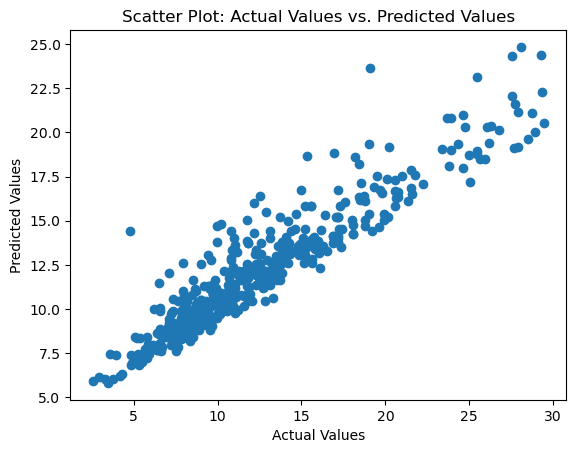

Coefficients of the best Lasso model:
                         Features  Coefficient
0                      InstRating    -0.479354
1                        Lectures     0.000041
2                        Duration    -0.000269
3                       AvgRating     0.327430
4                     LastUpdated     0.002712
5                             Fee    -0.000842
6                        Discount    -0.005529
7                 cbrt_Enrollment     0.508560
8                    cbrt_Student    -0.116094
9                     cbrt_Review     0.173946
10                category_design    -0.065315
11           category_it_software     0.304109
12             category_lifestyle    -0.412495
13             category_marketing    -0.041879
14  category_personal_development     0.000000
15           category_programming     0.229628


In [103]:
# Get the best Lasso model with alpha = 0.001
best_lasso_model = lasso_model_list[best_alpha_index]

# Plotting the scatter plot
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Scatter Plot: Actual Values vs. Predicted Values")
plt.show()

# Printing the coefficients of the best Lasso model
lasso_coefficients = pd.DataFrame({'Features': features.columns, 'Coefficient': best_lasso_model.coef_})
print("Coefficients of the best Lasso model:")
print(lasso_coefficients)

To be analyze the findings and discuss why a specific linear model or feature selection method performed better than the others.

Based on the provided summary DataFrame, it sshows that the Lasso linear model with an alpha value of 0.001 performed the best, achieving a R2 score of `0.900722` and a lowest RMSE value of `1.754775`. This indicates that the Lasso model was able to capture the underlying forrecast in the data effectively and make accurate predictions.

Regarding the feature selection methods, all three methods (Correlation selection, Variance Threshold selection, SelectKBest selection) without feature transformation achieved the almost same R2 and RMSE values.

On the other hand, the feature transformation technique using the Log1p transformation has resulted in slightly lower R2 and higher RMSE values compared to the models without transformation. This shows that log1p transformation might not be good to use for this dataset.

To conclude , the best linear model overall is the Lasso model with an alpha value of `0.001`. It performed better than other models in terms of accuracy and error metrics. The Lasso model stands out because it can select important features and leading to improved performance. The Lasso model's ability to select relevant features and control overfitting contributed to its superior performance in this case.